### Notebook for running tests

Notes:
- check the triple move restore
- check the eucentric angle correction
- check the stage position when restoring
- check eucentric reference correction
- insert to park and move down (check hfw for park)

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from fibsem import utils, acquire, movement, calibration

from liftout import utils as liftout_utils

In [2]:
microscope, settings = utils.setup_session()


2022-11-28 20:23:45,802 — root — INFO — connect_to_microscope:31 — Microscope client connecting to [10.0.0.1:7520]
Client connecting to [10.0.0.1:7520]...
2022-11-28 20:25:55,294 — root — ERROR — connect_to_microscope:36 — Unable to connect to the microscope: Client cannot establish connection with server at [10.0.0.1:7520]
2022-11-28 20:25:55,296 — root — INFO — setup_session:269 — Finished setup for session: demo_2022-11-28.08-23-45PM


In [ ]:
##multi position restore

# get state 1
state1 = calibration.get_current_microscope_state(microscope)

In [ ]:
# get state 2
state2 = calibration.get_current_microscope_state(microscope)

In [ ]:
# loop through positions, print microscope stage_position

last_position_1 = state1.absolute_position
last_position_2 = state2.absolute_position


print(f"start 1: {last_position_1}")
print(f"start 2: {last_position_2}")

for i in range(5):
    
    # restore state 1
    calibration.set_microscope_state(microscope, state1)

    new_position_1 = calibration.get_current_microscope_state(microscope).absolute_position

    print(f"state 1: {new_position_1}")
    print(f"diff 2: {last_position_1 - new_position_1}")

    # restore state 2
    calibration.set_microscope_state(microscope, state2)

    new_position_2 = calibration.get_current_microscope_state(microscope).absolute_position

    print(f"state 2: {new_position_1}")
    print(f"diff 2: {last_position_2 - new_position_2}")

In [4]:
# eucentric movement
from fibsem.structures import BeamType

dy=20e-6

settings.image.hfw = 150e-6

liftout_utils.take_reference_images_and_plot(microscope, settings.image)

movement.move_stage_eucentric_correction(microscope, settings, dy=dy)

liftout_utils.take_reference_images_and_plot(microscope, settings.image)

movement.move_stage_eucentric_correction(microscope, settings, dy=-dy)

liftout_utils.take_reference_images_and_plot(microscope, settings.image)


StagePosition(x=4, y=2, z=0, t=-4, r=-2)


### New landing entry position


In [ ]:
from liftout import actions

actions.move_needle_to_landing_position(microscope)

settings.image.hfw = 400e-6
liftout_utils.take_reference_images_and_plot(microscope, settings.image)

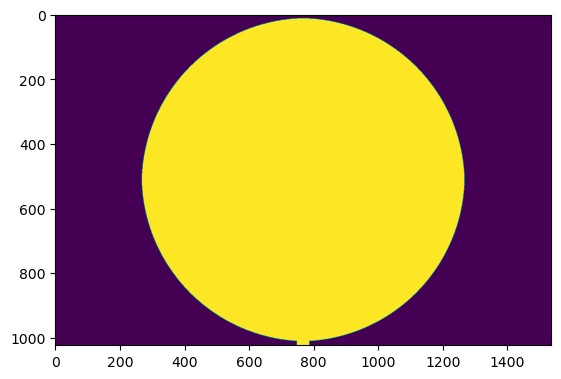

In [7]:

from fibsem import alignment
from fibsem.imaging import masks
from fibsem.structures import AdornedImage

image1 = AdornedImage.load("/home/patrick/github/autoliftout/liftout/tools/test_image.tif")
image2 = AdornedImage.load("/home/patrick/github/autoliftout/liftout/tools/test_image.tif")


mask = masks.create_circle_mask(image1.data.shape, radius=512)

# plot mask

import matplotlib.pyplot as plt

plt.imshow(mask)

plt.show()

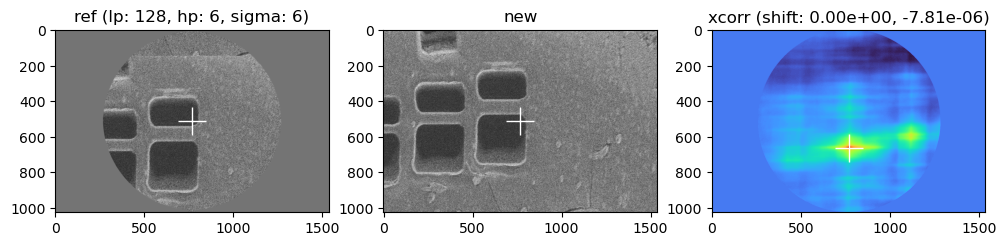

In [19]:
# np roll image 1 by 50 pixels

image1 = AdornedImage(data=np.roll(image1.data, 50, axis=0), metadata=image1.metadata)

dx, dy, xcorr = alignment.shift_from_crosscorrelation(image1, image2, xcorr_limit=512, ref_mask=mask)